In [17]:
#Import the libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
#Read the file
df=pd.read_csv("C:\\Users\\Divya Bagade\\OneDrive\\Desktop\\Churn_ Data.csv")
df.head()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0             -0.76        88.0482          3.106604           3.754955   
1             -0.98        67.5039          3.094574           5.550865   
2             -0.98        33.9248          2.324016           2.438114   
3             -0.92        82.6780          2.630749           2.858961   
4             -0.97        96.8379          2.674316           2.912397   

   s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
0              4                14          39.29            57.320   
1              1                 2          21.67            38.700   
2              2                 3          30.00            15.320   
3              2                 3          50.00            51.956   
4              3                 2          22.50            66.886   

   s8.new.rev.p6  s4.loc.ic.ins.p1  s8.mbl.p2  s2.rch.val.l67  \
0          -0.17                 1      -0.72           39.44   
1          -0.32                 3      -0.08           18.89   
2          -0.05                 3      -0.09           29.50   
3          -0.18                 4       1.83           46.67   
4           0.01                 4      -0.04           37.20   

   s7.s4.day.no.mou.p2.p4  s3.new.rev.p3  s7.s5.s4.day.nomou.p4  s8.og.rev.p3  \
0                1.000000           7.16               0.666667         -0.60   
1                0.500000           1.10               0.583333         -0.14   
2                0.384615           4.19               0.384615         -0.45   
3                0.416667           0.40               0.250000         -0.02   
4                0.222222           5.12               0.777778         -0.67   

   s8.ic.mou.all.p3  target  s7.new.rev.p2.p6  s6.rtd.mou.p2.m2  \
0             -0.73       1              0.05             -0.71   
1              0.00       1              0.00             -0.96   
2             -1.03       1              0.01             -0.98   
3             -0.43       0              0.02             -0.92   
4             -1.04       0              0.01             -0.98   

   s7.rtd.mou.p2.p6  s1.new.rev.p2  s1.new.rev.p1  s1.og.hom.mou.p1  \
0              0.06        16.3180         0.4378            0.3666   
1              0.01         0.7562         0.7562            0.6333   
2              0.00         0.5174         0.2189            0.1833   
3              0.02         1.2736         0.9751            0.8166   
4              0.00         0.2985         0.1990            0.1666   

   s7.rev.p2.p6  s1.og.hom.rev.p2  s1.rtd.mou.p1  s1.og.rev.all.p1  \
0          0.03           16.3180         0.3666            0.4378   
1          0.01            0.7562         0.6333            0.7562   
2          0.01            0.5174         0.1833            0.2189   
3         -0.14            1.2736         0.8166            0.9751   
4          0.04            0.2985         0.1666            0.1990   

   s1.og.mou.all.p1  s3.og.rev.all.p1  s7.new.rev.p3.p6  ds.usg.p6  \
0            0.3666              0.22              0.34          1   
1            0.6333              0.38              0.05          0   
2            0.1833              0.11              0.33          1   
3            0.8166              0.49              0.04          2   
4            0.1666              0.10              0.72          0   

   snd.dec.p2  s3.og.mou.all.p1  ds.og.usg.p4  s1.og.mou.all.p2  s8.og.rev.p6  \
0       -0.60              0.18             1           13.6665         -0.13   
1       -0.84              0.32             0            0.6333         -0.15   
2       -0.85              0.09             1            0.4332         -0.05   
3       -0.83              0.41             2            1.0666         -0.17   
4       -0.85              0.08             0            0.2499          0.01   

   s1.og.hom.mou.p2  s5.og.rev.all.p1  s1.og.rev.all.p2  s1.rtd.mou.p2  \
0           13

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


In [4]:
# Check the data types of each column
print(df.dtypes)

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
s4.og.unq.any.p2                int64
s2.rch.val.p6                 float64
s1.og.rev.all.m1              float64
s8.new.rev.p6                 float64
s4.loc.ic.ins.p1                int64
s8.mbl.p2                     float64
s2.rch.val.l67                float64
s7.s4.day.no.mou.p2.p4        float64
s3.new.rev.p3                 float64
s7.s5.s4.day.nomou.p4         float64
s8.og.rev.p3                  float64
s8.ic.mou.all.p3              float64
target                          int64
s7.new.rev.p2.p6              float64
s6.rtd.mou.p2.m2              float64
s7.rtd.mou.p2.p6              float64
s1.new.rev.p2                 float64
s1.new.rev.p1                 float64
s1.og.hom.mou.p1              float64
s7.rev.p2.p6                  float64
s1.og.hom.rev.p2              float64
s1.rtd.mou.p

In [5]:
# check statistics of Numeric variables
df.describe()

s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
count      25000.000000   25000.000000      25000.000000       25000.000000   
mean          -0.003730     281.073083          4.890003           7.070194   
std            2.727916     276.075983          4.212452           6.318992   
min           -1.000000       0.000000          0.000000           0.000833   
25%           -0.580000     101.563800          2.367288           3.318825   
50%           -0.170000     204.859600          3.729944           5.231268   
75%            0.280000     370.711650          5.993342           8.395736   
max          316.860000    5702.924300        153.221695         170.200441   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.p6  s1.og.rev.all.m1  \
count   25000.000000      25000.000000   25000.000000      25000.000000   
mean        5.460080         28.532520      72.208906        218.517937   
std         2.184444         28.061435      67.921490        231.321064   
min         0.000000          0.000000       0.000000          0.000000   
25%         5.000000          9.000000      33.000000         74.420000   
50%         7.000000         21.000000      52.260000        151.168500   
75%         7.000000         39.000000      89.852500        284.265000   
max         7.000000        622.000000    2249.000000       3767.565000   

       s8.new.rev.p6  s4.loc.ic.ins.p1     s8.mbl.p2  s2.rch.val.l67  \
count   25000.000000      25000.000000  25000.000000    25000.000000   
mean       -0.028327          3.254720     -0.073908       71.354504   
std         0.354573          1.193271      8.829159       63.348225   
min        -5.090000          0.000000   -153.750000        0.000000   
25%        -0.160000          3.000000     -2.560000       33.500000   
50%        -0.020000          4.000000     -0.080000       51.670000   
75%         0.110000          4.000000      1.040000       87.585000   
max         5.000000          4.000000    183.350000     1000.000000   

       s7.s4.day.no.mou.p2.p4  s3.new.rev.p3  s7.s5.s4.day.nomou.p4  \
count            25000.000000   25000.000000           25000.000000   
mean                28.481545      10.961799               0.284181   
std                 44.601940      12.092535               0.333501   
min                  0.000000       0.000000               0.000000   
25%                  0.100000       4.430000               0.000000   
50%                  0.363636       7.820000               0.000000   
75%                 99.000000      13.060000               0.500000   
max                 99.000000     395.120000               1.000000   

       s8.og.rev.p3  s8.ic.mou.all.p3        target  s7.new.rev.p2.p6  \
count  25000.000000      25000.000000  25000.000000      25000.000000   
mean      -0.074922         -0.051559      0.316680          0.166592   
std        0.784939          1.005683      0.465191          0.110928   
min      -31.670000        -24.290000      0.000000          0.000000   
25%       -0.330000         -0.290000      0.000000          0.090000   
50%       -0.030000         -0.020000      0.000000          0.160000   
75%        0.200000          0.210000      1.000000          0.230000   
max        7.880000         35.920000      1.000000          0.990000   

       s6.rtd.mou.p2.m2  s7.rtd.mou.p2.p6  s1.new.rev.p2  s1.new.rev.p1  \
count      25000.000000      25000.000000   25000.000000   25000.000000   
mean          -0.015919          0.168325      70.217496      39.055654   
std            0.996750          0.109865      80.805037      49.565506   
min           -1.000000          0.000000       0.000000       0.000000   
25%           -0.540000          0.100000      18.610525       7.701300   
50%           -0.150000          0.160000      46.028450      23.917350   
75%            0.270000          0.230000      92.119200      51.593400   
max           34.620000          0.890000    1683.072500     992.369700 

# Data preprocessing

In [ ]:
Data preprocessing involves preparing and cleaning the dataset to ensure high-quality input for analysis or modeling.

In [6]:
df.shape

(25000, 111)

In [7]:
df.dtypes.value_counts()

float64    80
int64      31
Name: count, dtype: int64

In [8]:
#Checking the datatypes
pd.set_option('display.max_rows',None)
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
s4.og.unq.any.p2                int64
s2.rch.val.p6                 float64
s1.og.rev.all.m1              float64
s8.new.rev.p6                 float64
s4.loc.ic.ins.p1                int64
s8.mbl.p2                     float64
s2.rch.val.l67                float64
s7.s4.day.no.mou.p2.p4        float64
s3.new.rev.p3                 float64
s7.s5.s4.day.nomou.p4         float64
s8.og.rev.p3                  float64
s8.ic.mou.all.p3              float64
target                          int64
s7.new.rev.p2.p6              float64
s6.rtd.mou.p2.m2              float64
s7.rtd.mou.p2.p6              float64
s1.new.rev.p2                 float64
s1.new.rev.p1                 float64
s1.og.hom.mou.p1              float64
s7.rev.p2.p6                  float64
s1.og.hom.rev.p2              float64
s1.rtd.mou.p

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


# Checking and removing Duplicate Records

In [11]:
df.drop_duplicates(inplace=True)
# Check the number of rows after removing duplicates
print(df.shape[0])

25000


# Identify and Remove nonunique value

In [12]:
# Get the number of unique values for each column
n_unique = df.nunique()
# Identify columns with only one unique value
unique_cols = n_unique[n_unique == 1].index
# Remove the unique value columns
df.drop(unique_cols, axis=1, inplace=True)
# Check the updated column list
print(df.columns)

Index(['s6.new.rev.p2.m2', 's1.new.rev.m1', 's3.og.rev.4db.p5',
       's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2',
       's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6',
       's4.loc.ic.ins.p1',
       ...
       'prop.og.mou.tot.mou.all.p6', 'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2',
       's4.std.ic.ins.l14', 's4.low.blnc.ins.p4', 's3.og.rev.all.m2',
       's3.new.rev.m2', 'prop.og.mou.any.p6', 'prop.loc.i2i.mou.og.mou.p3',
       's3.rev.p1'],
      dtype='object', length=111)


In [13]:
df.shape

(25000, 111)

# Identify columns with zero variance

In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
# Calculate the variance for each numeric column
variances = numeric_cols.var()
# Identify columns with zero variance
zero_variance_cols = variances[variances == 0].index
# Remove the zero variance columns
df.drop(zero_variance_cols, axis=1, inplace=True)
# Check the updated column list
print(df.columns)

In [15]:
df.shape

(25000, 111)

# Outlier treatment using Box Plot
Q3+(1.5IQR) & Q1-(1.5IQR)

Identified Outliers using IQR:

s6.new.rev.p2.m2 Outliers:
6        2.41
13       1.79
56       2.25
62       2.41
92       3.27
         ... 
24801    4.09
24835    1.83
24858    1.80
24867    2.08
24921    2.36
Name: s6.new.rev.p2.m2, Length: 1024, dtype: float64

s1.new.rev.m1 Outliers:
5         968.7667
8         787.2101
28        788.7810
54        877.1259
60       1253.2994
           ...    
24944    1132.2849
24962    1498.2453
24969     911.8042
24975     836.6072
24998    1012.4398
Name: s1.new.rev.m1, Length: 1335, dtype: float64

s3.og.rev.4db.p5 Outliers:
5        14.717216
8        22.598879
11       12.126048
35       12.534018
41       19.607237
           ...    
24934    13.364285
24962    15.815465
24975    11.967051
24976    16.324064
24998    14.667580
Name: s3.og.rev.4db.p5, Length: 1543, dtype: float64

s3.new.rev.4db.p5 Outliers:
5        23.589827
8        23.574696
35       18.935822
41       24.041198
54       19.507506
           ...    
24972    21.88450

C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\701350854.py:39: UserWarning: The figure layout has changed t

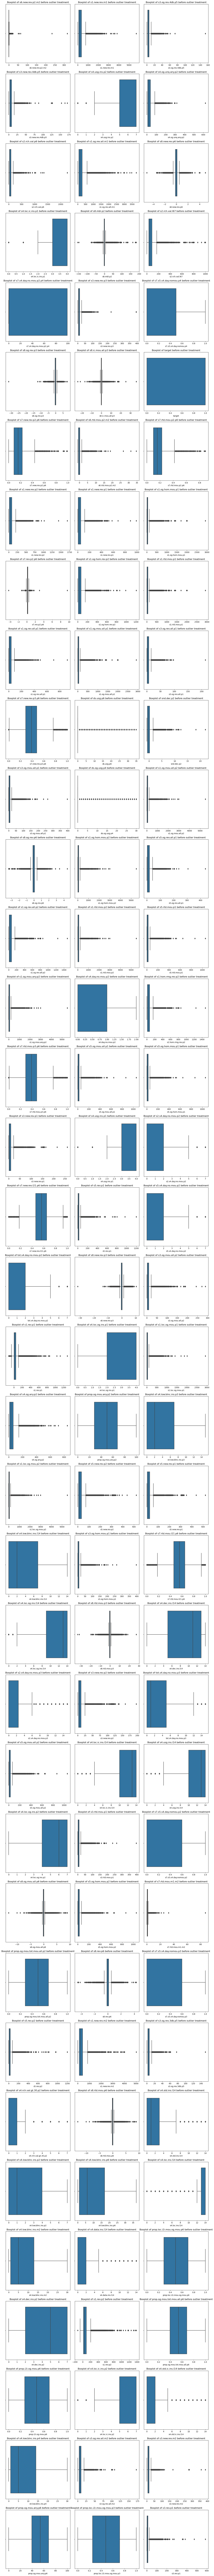

In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Identify outliers for each numeric column using the IQR method
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print the results
print("Identified Outliers using IQR:")
for col, outlier_values in outliers.items():
    print(f"\n{col} Outliers:")
    print(outlier_values)

# Visualize boxplots before outlier treatment
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} before outlier treatment')
    plt.tight_layout()
    
plt.show()


In [14]:
df.shape

(25000, 111)

# standardization +/-3 sigma approach

Number of rows: 25000
Number of columns: 111

Number of rows after removing outliers: 7619
Number of columns: 111


C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Divya Bagade\AppData\Local\Temp\ipykernel_69012\402295440.py:40: UserWarning: The figure layout has changed t

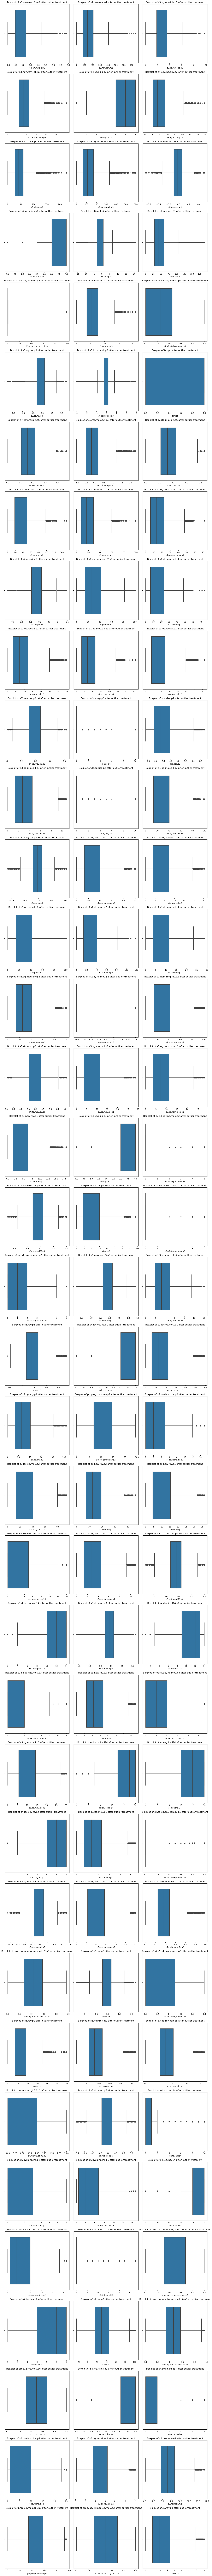

In [15]:
# Print the number of rows and columns in the DataFrame
rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Identify and remove outliers for each numeric column using the Z-score method
for col in numeric_cols:
    mean_col = df[col].mean()
    std_col = df[col].std()
    z_scores = (df[col] - mean_col) / std_col
    df = df[np.abs(z_scores) <= 3]

# Print the number of rows and columns in the DataFrame after removing outliers
rows, cols = df.shape
print(f"\nNumber of rows after removing outliers: {rows}")
print(f"Number of columns: {cols}")

# Visualize boxplots after outlier treatment
num_cols = len(numeric_cols)
cols_per_row = 3
num_rows = (num_cols - 1) // cols_per_row + 1

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} after outlier treatment')
    plt.tight_layout()

plt.show()


In [16]:
df.shape

(7619, 111)

# Capping And Flooring

Initial Data Shape: (25000, 111)


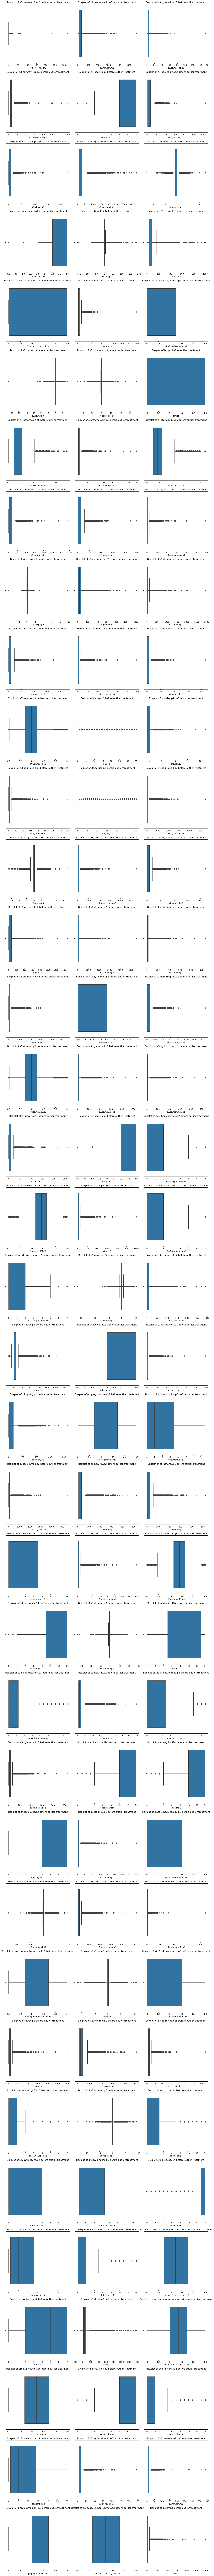


Data Shape after capping and flooring: (25000, 111)


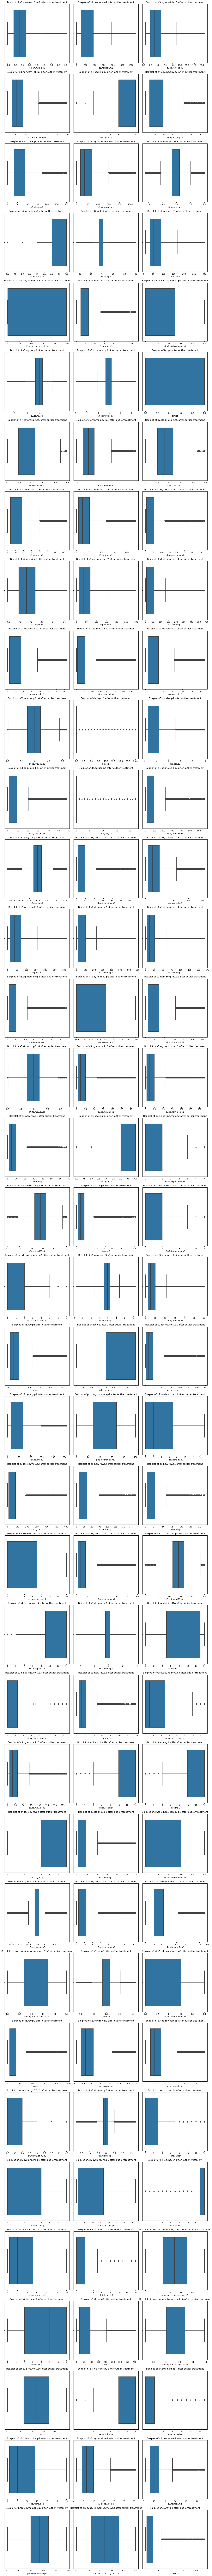

In [26]:
def cap_floor_outliers(df, numeric_cols, lower_percentile=0.01, upper_percentile=0.99):
    df_capped = df.copy()
    for col in numeric_cols:
        lower_bound = df_capped[col].quantile(lower_percentile)
        upper_bound = df_capped[col].quantile(upper_percentile)
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped

def visualize_boxplots(df, numeric_cols, stage):
    num_cols = len(numeric_cols)
    cols_per_row = 3
    num_rows = (num_cols - 1) // cols_per_row + 1
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col} {stage} outlier treatment')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.tight_layout()
    plt.show()
def main(file_path):
    df = read_data(file_path) 
    print(f"Initial Data Shape: {df.shape}")
    numeric_cols = df.select_dtypes(include=['number']).columns
    visualize_boxplots(df, numeric_cols, 'before') 
    df_capped = cap_floor_outliers(df, numeric_cols)
    print(f"\nData Shape after capping and flooring: {df_capped.shape}")
    visualize_boxplots(df_capped, numeric_cols, 'after')

# Missing value treatment

In [35]:
# Calculate the number of non-null values in each row
row_non_nulls = df.count(axis=1)
# Calculate the threshold number of non-null values required to keep a row
threshold = int(df.shape[1] * 0.95)  # 95% of columns
# Drop rows with missing values less than the threshold
df_clean = df.dropna(thresh=threshold)
# Print the shape of the cleaned DataFrame
print(df_clean.shape)

(25000, 111)


In [36]:
# Calculate the number of non-null values in each row
row_non_nulls = df.count(axis=1)
# Calculate the threshold number of non-null values required to keep a row
threshold = int(df.shape[1] * 0.5)  # 50% of columns
# Drop rows with missing values less than the threshold
df_clean = df.dropna(thresh=threshold)
# Print the shape of the cleaned DataFrame
print(df_clean.shape)

(25000, 111)


In [37]:
# Setting display options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
# Counting missing values
missing_values = df.isnull().sum()
print(missing_values)

s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
s4.og.unq.any.p2              0
s2.rch.val.p6                 0
s1.og.rev.all.m1              0
s8.new.rev.p6                 0
s4.loc.ic.ins.p1              0
s8.mbl.p2                     0
s2.rch.val.l67                0
s7.s4.day.no.mou.p2.p4        0
s3.new.rev.p3                 0
s7.s5.s4.day.nomou.p4         0
s8.og.rev.p3                  0
s8.ic.mou.all.p3              0
target                        0
s7.new.rev.p2.p6              0
s6.rtd.mou.p2.m2              0
s7.rtd.mou.p2.p6              0
s1.new.rev.p2                 0
s1.new.rev.p1                 0
s1.og.hom.mou.p1              0
s7.rev.p2.p6                  0
s1.og.hom.rev.p2              0
s1.rtd.mou.p1                 0
s1.og.rev.all.p1              0
s1.og.mou.all.p1              0
s3.og.rev.all.p1              0
s7.new.rev.p3.p6              0
ds.usg.p

In [38]:
df.shape

(25000, 111)

# Removing highly correlated variables

In [39]:
# Calculating the correlation matrix
corr_matrix = df.corr().abs()
# Selecting upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Finding features with correlation greater than 0.9
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# Dropping the highly correlated features
df_reduced = df.drop(columns=to_drop)
print("Dropped columns:", to_drop)
print("Remaining columns:", df_reduced.columns)

Dropped columns: ['s1.og.rev.all.m1', 's2.rch.val.l67', 's1.new.rev.p1', 's1.rtd.mou.p1', 's1.og.rev.all.p1', 's1.og.mou.all.p1', 'snd.dec.p2', 'ds.og.usg.p4', 's1.og.mou.all.p2', 's8.og.rev.p6', 's1.og.hom.mou.p2', 's5.og.rev.all.p1', 's1.og.rev.all.p2', 's1.rtd.mou.p2', 's5.rtd.mou.p1', 's1.og.mou.any.p2', 's1.hom.rmg.rev.p2', 's5.og.mou.all.p1', 's5.og.hom.mou.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's1.rev.p1', 's1.loc.og.mou.p1', 's4.og.any.p2', 's1.loc.og.mou.p2', 's5.new.rev.p1', 's4.low.blnc.ins.l14', 's3.og.hom.mou.p1', 's3.new.rev.p2', 'tot.s4.day.no.mou.p3', 's5.og.mou.all.p2', 's4.usg.ins.l14', 's4.loc.og.ins.p2', 's3.rtd.mou.p1', 's7.s5.s4.day.nomou.p2', 's5.og.hom.mou.p2', 'prop.og.mou.tot.mou.all.p2', 's3.og.rev.3db.p5', 's8.rtd.mou.p6', 's4.low.blnc.ins.p2', 's4.low.blnc.ins.m2', 's4.dec.ins.p2', 'prop.i2i.og.mou.p6', 's4.loc.ic.ins.p2', 's4.low.blnc.ins.p4', 's3.og.rev.all.m2', 's3.new.rev.m2', 'prop.og.mou.any.p6', '

In [40]:
df.shape

(25000, 111)

# Multicollinearity(VIF>5)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif
# Function to visualize columns with VIF > threshold
def visualize_high_vif_columns(df, vif_data, threshold=5):
    high_vif_columns = vif_data[vif_data['VIF'] > threshold]['Variable'].tolist()
    num_cols = len(high_vif_columns)
    cols_per_row = 3
    num_rows = (num_cols - 1) // cols_per_row + 1
    fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    for i, col in enumerate(high_vif_columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    fig.tight_layout()
    plt.show()
# Iteratively remove features with VIF > threshold
def remove_high_vif(data, threshold=5.0):
    while True:
        vif = calculate_vif(data)
        print(vif)  # Debug print to see VIF values
        max_vif = vif['VIF'].max()
        if np.isinf(max_vif) or max_vif > threshold:
            remove = vif.loc[vif['VIF'].idxmax(), 'Variable']
            print(f"Dropping '{remove}' with VIF: {max_vif}")
            data = data.drop(columns=[remove])
        else:
            break
    return data, vif
# Main function to process data
def main(file_path):
    # Read data from file
    df = pd.read_csv(file_path)  
    # Select numeric columns only for VIF calculation
    numeric_df = df.select_dtypes(include=[np.number])  
    print(f"Initial number of numeric columns: {numeric_df.shape[1]}")   
    # Remove high VIF features
    reduced_df, final_vif = remove_high_vif(numeric_df)   
    # Print final VIF values
    print("Final VIF values:\n", final_vif)
    print("Remaining columns:\n", reduced_df.columns)   
    # Visualize columns with VIF > 5
    visualize_high_vif_columns(df, final_vif, threshold=5)

Initial number of numeric columns: 111


C:\Users\Divya Bagade\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Variable           VIF
0              s6.new.rev.p2.m2      1.240843
1                 s1.new.rev.m1     19.853156
2              s3.og.rev.4db.p5     35.403000
3             s3.new.rev.4db.p5     27.147695
4                 s4.usg.ins.p2  67967.607333
..                          ...           ...
106            s3.og.rev.all.m2     16.644695
107               s3.new.rev.m2     24.371570
108          prop.og.mou.any.p6     20.330846
109  prop.loc.i2i.mou.og.mou.p3      3.940450
110                   s3.rev.p1     85.182432

[111 rows x 2 columns]
Dropping 's1.og.rev.all.p2' with VIF: inf


C:\Users\Divya Bagade\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                       Variable           VIF
0              s6.new.rev.p2.m2      1.240843
1                 s1.new.rev.m1     19.853156
2              s3.og.rev.4db.p5     35.403000
3             s3.new.rev.4db.p5     27.147695
4                 s4.usg.ins.p2  67967.607333
..                          ...           ...
105            s3.og.rev.all.m2     16.644695
106               s3.new.rev.m2     24.371570
107          prop.og.mou.any.p6     20.330846
108  prop.loc.i2i.mou.og.mou.p3      3.940450
109                   s3.rev.p1     85.182432

[110 rows x 2 columns]
Dropping 's4.low.blnc.ins.p2' with VIF: inf
                       Variable           VIF
0              s6.new.rev.p2.m2      1.240843
1                 s1.new.rev.m1     19.853156
2              s3.og.rev.4db.p5     35.403000
3             s3.new.rev.4db.p5     27.147695
4                 s4.usg.ins.p2  67967.607333
..                          ...           ...
104            s3.og.rev.all.m2     16.644695
105         

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

# Decision Tree Model with Hyperparameter Tuning and Evaluation

In [2]:
# Step 1: Load and Preprocess Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (confusion_matrix, accuracy_score, 
                             precision_score, recall_score, 
                             f1_score, roc_curve, roc_auc_score)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import graphviz
import seaborn as sns
import joblib
# Reading the churn data from a CSV file
churn_data = pd.read_csv("C:\\Users\\Divya Bagade\\OneDrive\\Desktop\\Churn_ Data.csv")
# Selecting Features
features = churn_data.columns.drop("target")
target = ["target"]
# Encoding categorical variables
churn_data_encoded = pd.get_dummies(churn_data[features])
churn_data_encoded["target"] = churn_data["target"]
# Splitting the data into train and test set in a ratio of 85:15
churn_train, churn_test = train_test_split(churn_data_encoded, test_size=0.15, random_state=100)

In [3]:
#Step 2: Train Decision Tree Model
# Inducting the decision tree model
model = DecisionTreeClassifier()
features = churn_train.columns.drop("target")
model.fit(churn_train[features], churn_train[target])

DecisionTreeClassifier()

In [21]:
#Step 3: Hyperparameter Tuning with Randomized Search
# Hyperparameter Tuning with Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 21),
    'min_samples_leaf': randint(1, 11)
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(churn_train[features], churn_train[target].values.ravel())
print(f"Best parameters found (Randomized Search): {random_search.best_params_}")
print(f"Best accuracy score (Randomized Search): {random_search.best_score_}")

Best parameters found (Randomized Search): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
Best accuracy score (Randomized Search): 0.7760941176470588


In [22]:
#Step 4: Evaluate the Best Model
best_model_random = random_search.best_estimator_
accuracy_random = best_model_random.score(churn_test[features], churn_test[target])
print(f"Test set accuracy with Randomized Search: {accuracy_random}")

Test set accuracy with Randomized Search: 0.7765333333333333


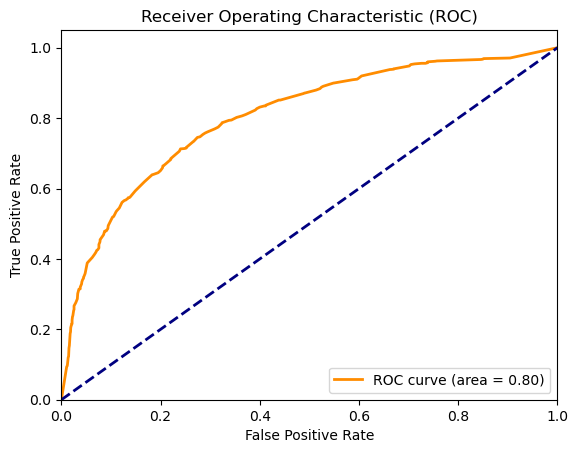

In [23]:
#Step 5: Plot ROC Curve
# Predict probabilities for the test set
y_pred_prob = best_model_random.predict_proba(churn_test[features])[:, 1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(churn_test[target], y_pred_prob)
roc_auc = roc_auc_score(churn_test[target], y_pred_prob)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
We compute the confusion matrix and other performance metrics like precision, recall, and F1-score.

In [24]:
#Step 6: Confusion Matrix and Other Metrics
# Predict labels for the test set
y_pred = best_model_random.predict(churn_test[features])
# Confusion Matrix
conf_matrix = confusion_matrix(churn_test[target], y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Other Metrics
accuracy = accuracy_score(churn_test[target], y_pred)
precision = precision_score(churn_test[target], y_pred)
recall = recall_score(churn_test[target], y_pred)
f1 = f1_score(churn_test[target], y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Confusion Matrix:
 [[2241  312]
 [ 526  671]]
Accuracy: 0.7765333333333333
Precision: 0.6826042726347915
Recall: 0.5605680868838764
F1-Score: 0.6155963302752294


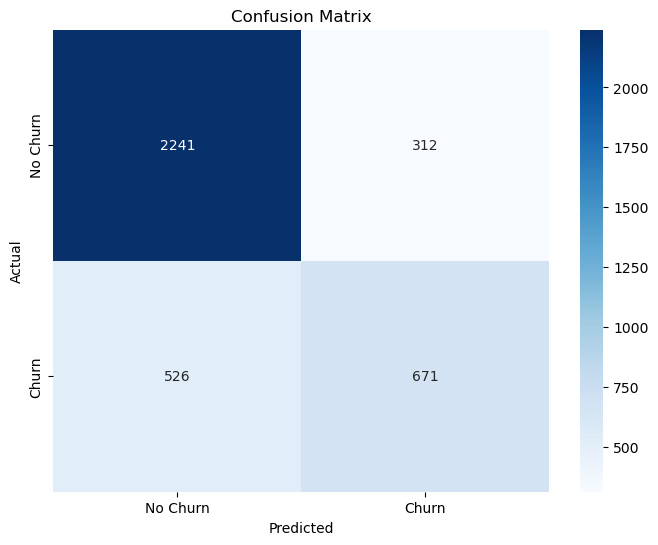

In [25]:
#Step 7: Plot Confusion Matrix
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#Step8 Visualize the Decision Tree
# Visualize the Decision Tree
dot_data = export_graphviz(best_model_random, out_file=None, feature_names=features, class_names=['No Churn', 'Churn'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

# Save and render the visualization as a PDF
graph.render("decision_tree", format="pdf")


'decision_tree.pdf'

You can view the full decision tree by clicking [here](decision_tree.pdf).

In [ ]:
We analyze the feature importance to understand which features are most influential in the model's decisions.

Feature Importances:
                      importance
s6.rtd.mou.p2.m2       0.389753
s7.rtd.mou.p2.p6       0.142903
s7.new.rev.p2.p6       0.084791
s7.rtd.mou.m1.m2       0.016867
s4.loc.og.ins.p1       0.014721
...                         ...
s5.rtd.mou.p1          0.000000
s2.s4.day.no.mou.p2    0.000000
s3.og.hom.mou.p1       0.000000
s5.og.hom.mou.p2       0.000000
s3.rtd.mou.p1          0.000000

[110 rows x 1 columns]


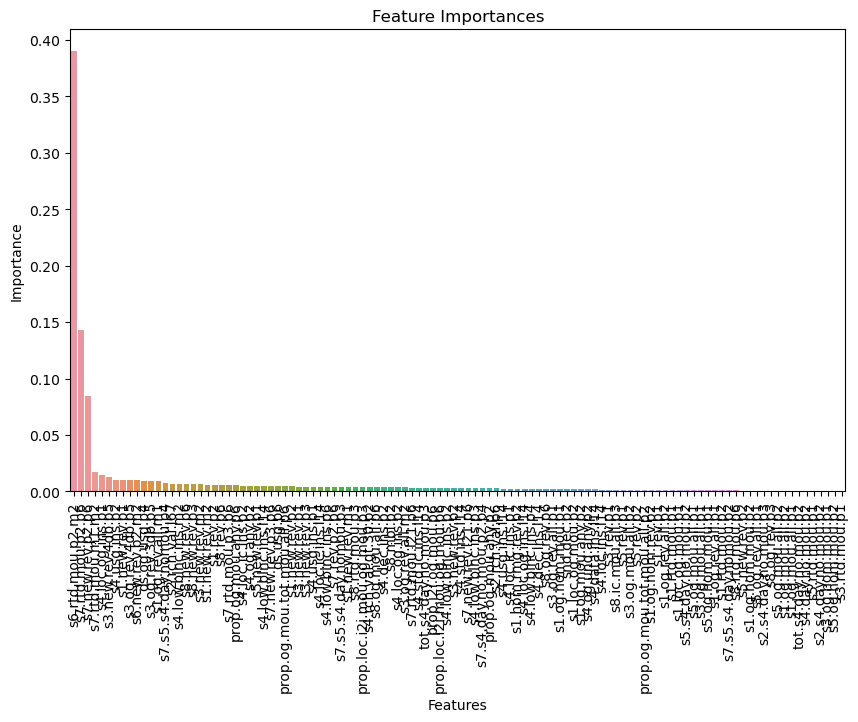

In [18]:
#Step 7: Feature Importance
feature_importances = pd.DataFrame(best_model_random.feature_importances_,
                                   index=features,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances:\n", feature_importances)
# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# LogisticRegression

Test set accuracy: 0.7941333333333334


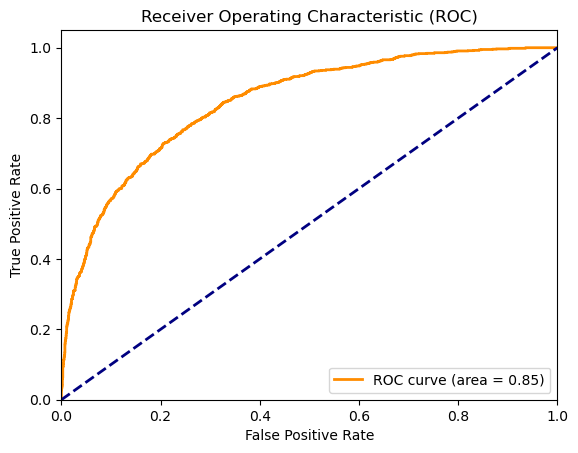

Confusion Matrix:
 [[2276  277]
 [ 495  702]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2553
           1       0.72      0.59      0.65      1197

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.79      0.79      0.79      3750



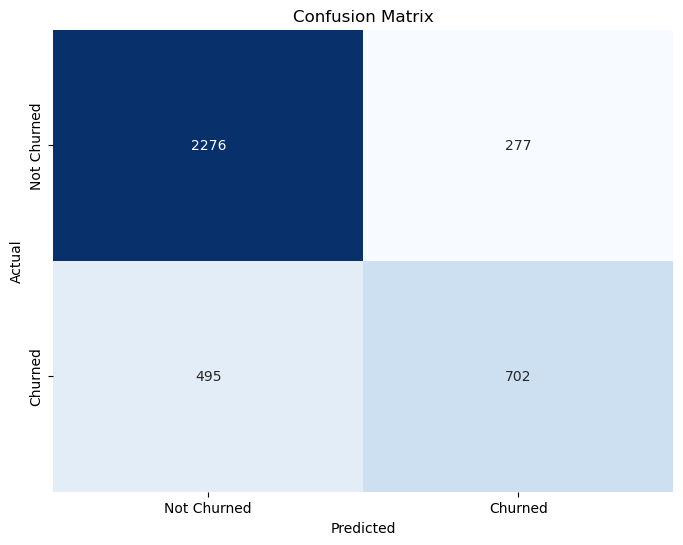

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Reading the churn data from a CSV file
churn_data = pd.read_csv("C:\\Users\\Divya Bagade\\OneDrive\\Desktop\\Churn_ Data.csv")

# Selecting Features and Target
features = churn_data.columns.drop("target")
target = "target"

# Encoding categorical variables
churn_data_encoded = pd.get_dummies(churn_data[features], drop_first=True)
churn_data_encoded[target] = churn_data[target]

# Splitting the data into train and test set in a ratio of 85:15
churn_train, churn_test = train_test_split(churn_data_encoded, test_size=0.15, random_state=100)

# Feature scaling (optional, but can improve logistic regression performance)
scaler = StandardScaler()
churn_train[features] = scaler.fit_transform(churn_train[features])
churn_test[features] = scaler.transform(churn_test[features])

# Inducting the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(churn_train[features], churn_train[target])

# Evaluate the Model
accuracy = model.score(churn_test[features], churn_test[target])
print(f"Test set accuracy: {accuracy}")

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(churn_test[features])[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(churn_test[target], y_pred_prob)
roc_auc = roc_auc_score(churn_test[target], y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Additional evaluation metrics
y_pred = model.predict(churn_test[features])
cm = confusion_matrix(churn_test[target], y_pred)
report = classification_report(churn_test[target], y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# RandomForest

Test set accuracy: 0.79


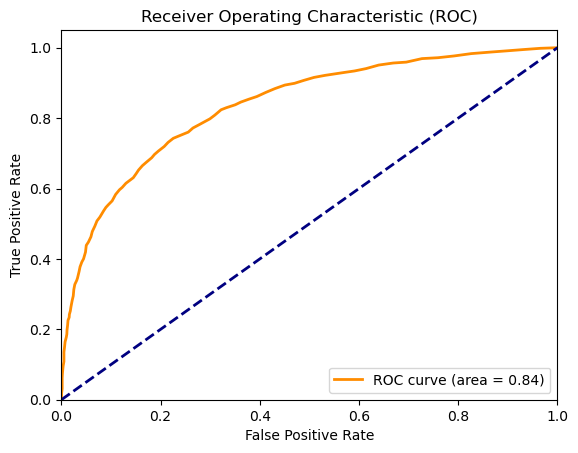

Confusion Matrix:
 [[2274  279]
 [ 499  698]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      2553
           1       0.71      0.58      0.64      1197

    accuracy                           0.79      3750
   macro avg       0.77      0.74      0.75      3750
weighted avg       0.79      0.79      0.79      3750



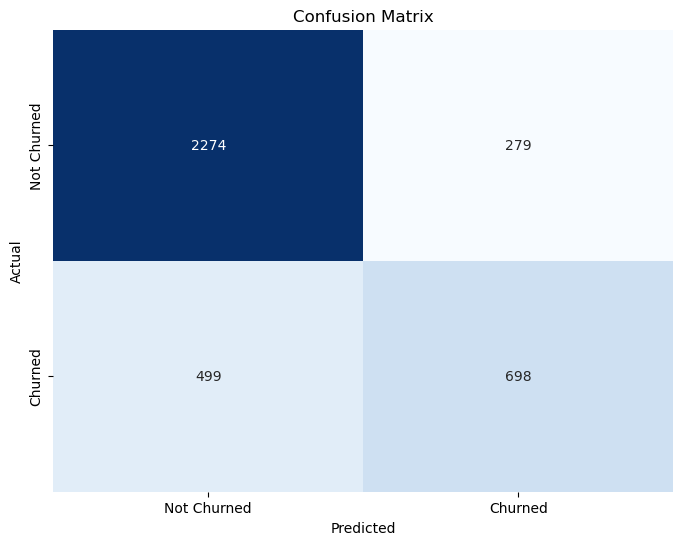

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Reading the churn data from a CSV file
churn_data = pd.read_csv("C:\\Users\\Divya Bagade\\OneDrive\\Desktop\\Churn_ Data.csv")

# Selecting Features and Target
features = churn_data.columns.drop("target")
target = "target"

# Encoding categorical variables
churn_data_encoded = pd.get_dummies(churn_data[features], drop_first=True)
churn_data_encoded[target] = churn_data[target]

# Splitting the data into train and test set in a ratio of 85:15
churn_train, churn_test = train_test_split(churn_data_encoded, test_size=0.15, random_state=100)

# Feature scaling (optional, but can improve model performance)
scaler = StandardScaler()
churn_train[features] = scaler.fit_transform(churn_train[features])
churn_test[features] = scaler.transform(churn_test[features])

# Inducting the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(churn_train[features], churn_train[target])

# Evaluate the Model
accuracy = rf_model.score(churn_test[features], churn_test[target])
print(f"Test set accuracy: {accuracy:.2f}")

# Predict probabilities for the test set
y_pred_prob = rf_model.predict_proba(churn_test[features])[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(churn_test[target], y_pred_prob)
roc_auc = roc_auc_score(churn_test[target], y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Additional evaluation metrics
y_pred = rf_model.predict(churn_test[features])
cm = confusion_matrix(churn_test[target], y_pred)
report = classification_report(churn_test[target], y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Model Comparison: Logistic Regression vs. Random Forest
In this notebook, we compare the performance of Logistic Regression and Random Forest models on a dataset. 
Our initial observation showed that both models had similar accuracy. We will delve deeper into their performance using various
metrics and analyses to understand why this might be the case.Given that both models initially showed similar accuracy, we will
train each model and evaluate their performance using various metrics to get a more comprehensive understanding.Despite similar
accuracy, other metrics like precision, recall, and F1-score can provide deeper insights into model performance.
We will also use ROC-AUC curves and confusion matrices to compare the models further.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("C:\\Users\\Divya Bagade\\OneDrive\\Desktop\\Churn_ Data.csv")
# Assume the target column is 'target' and rest are features
X = df.drop(columns=['target'])
y = df['target']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1-Score: {f1_log_reg}")

Logistic Regression - Accuracy: 0.8013333333333333, Precision: 0.7330246913580247, Recall: 0.5947412353923205, F1-Score: 0.6566820276497696


C:\Users\Divya Bagade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest)
recall_rf = recall_score(y_test, y_pred_random_forest)
f1_rf = f1_score(y_test, y_pred_random_forest)
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}")

Random Forest - Accuracy: 0.8001333333333334, Precision: 0.7346938775510204, Recall: 0.5859766277128547, F1-Score: 0.6519619224518226


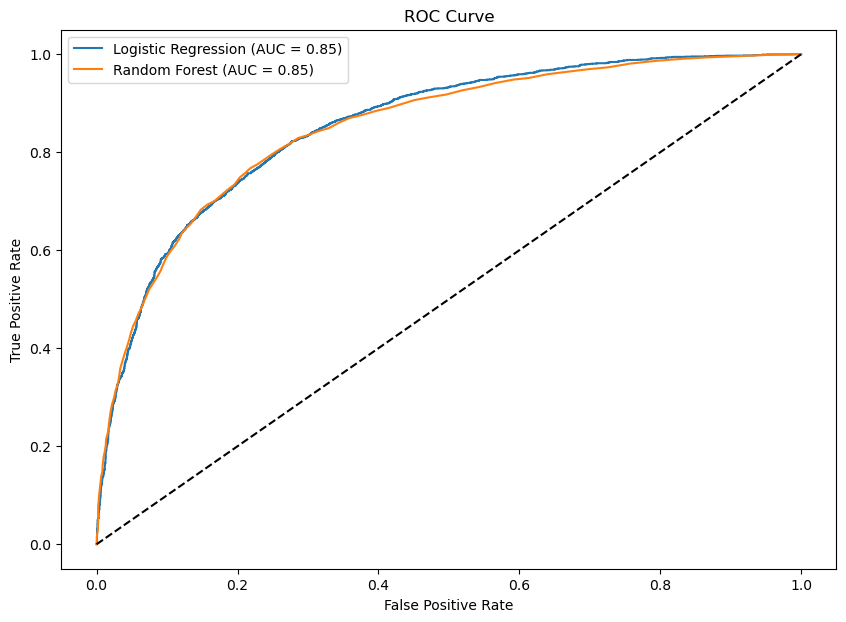

Logistic Regression ROC-AUC: 0.85
Random Forest ROC-AUC: 0.85


In [15]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# ROC-AUC Score
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
# Plot ROC Curves
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
# Print ROC-AUC Scores
print(f"Logistic Regression ROC-AUC: {roc_auc_log_reg:.2f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.2f}")

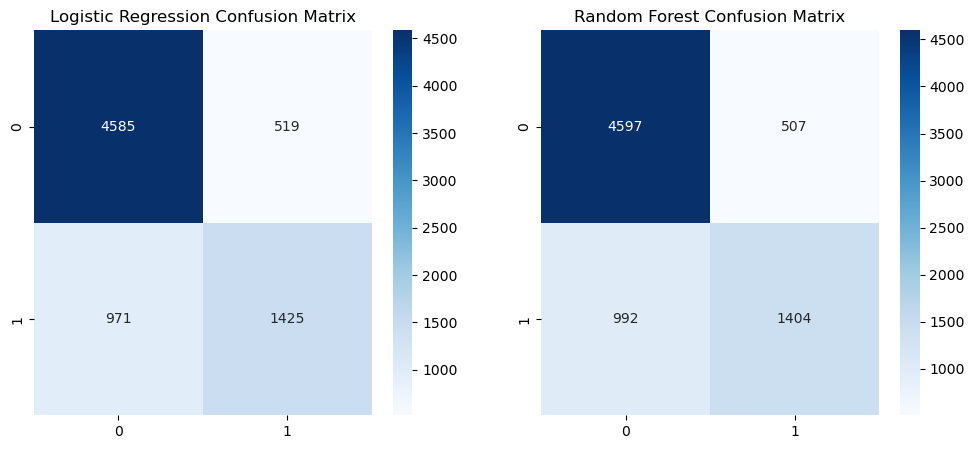

In [16]:
import seaborn as sns
# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)
# Confusion Matrix Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', ax=axes[0], cmap='Blues')
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[1].set_title('Random Forest Confusion Matrix')
plt.show()